In [1]:
%reset -f
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import cumtrapz

In [2]:
import fokker_planck

# Introduction

We consider the Fokker-Planck operator

\begin{align}
\mathcal{F}\rho(x) &= - \partial_x\left(a\rho\right) + \partial_x^2 \left( D \rho\right)
\end{align}

on a finite domain, $x \in [x_l,x_r]$, and with absorbing boundary conditions 
$\rho(x_l) = \rho(x_r) = 0$.


The spectrum $(\lambda_n, \Psi_n)$ is defined by the eigenvalue equation

\begin{equation}
 \mathcal{F}\Psi_n = \lambda_n \Psi_n,
\end{equation}

where $\lambda_n$ is the $n$-th eigenvalue, and $\Psi_n$ is the corresponding $n$-th eigenfunction which fulfills the absorbing boundary conditions, i.e. $\Psi_n(x_l) = \Psi_n(x_r) = 0$.

# Model parameters and illustration of drift profile

For a given length scale $L$ and a time scale $T$, we consider the interval $[x_l,x_r] = [-2L,2L]$.
We assume a constant diffusivity $D(x) \equiv D_0 \equiv 1\cdot L^2/T$, and a linear drift profile

\begin{align}
a(x) = -a_1 x,
\end{align}

with a constant $a_1 = 10\cdot 1/T$. This linear drift profile corresponds to a quadratic potential, i.e. $a(x) =-(\partial_xU)(x)$ with $U(x) = a_1 x^2/2$ (up to an additive constant).

In [3]:
a_1 = 10. # units: 1/T
D_0 = 1. # units: L^2/T
a = lambda x: -a_1*x # returns units: L/T
D = D_0 # units: L^2/T

xl = -2 # units: L
xr = 2 # units: L
Nx = 1000 # number of bins for discretization of interval [xl,xr]

We first illustrate the drift profile and the corresponding potential:

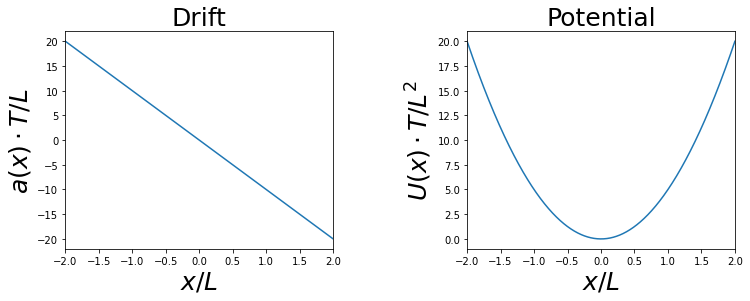

In [4]:
x = np.linspace(xl,xr,num=Nx+1,endpoint=True)

fig,axes = plt.subplots(1,2,figsize=(12,4))
fig.subplots_adjust(wspace=0.5)
fontsize=25

ax = axes[0]
ax.set_title('Drift',fontsize=fontsize)
ax.plot(x,a(x))
ax.set_xlim(np.min(x),np.max(x))
ax.set_xlabel(r'$x/L$',fontsize=fontsize)
ax.set_ylabel(r'$a(x)\cdot T/L$',fontsize=fontsize)

ax = axes[1]
ax.set_title('Potential',fontsize=fontsize)
div_U = -a(x)
U = cumtrapz(div_U,x,initial=0) - np.trapz(div_U[:Nx//2],x[:Nx//2])
ax.plot(x,U)
ax.set_xlim(np.min(x),np.max(x))
ax.set_xlabel(r'$x/L$',fontsize=fontsize)
ax.set_ylabel(r'$U(x) \cdot T/L^2$',fontsize=fontsize)

plt.show()
plt.close(fig)

# Calculation and visualization of spectrum

To calculate the spectrum, we first initialize a class of fokker_planck using the parameters defined above.

In [5]:
bcs= 'absorbing'
parameters = {'xl':xl,
              'xr':xr,
                'Nx':Nx,
             'boundary_condition_left':bcs,
             'boundary_condition_right':bcs
             }

fokker_planck_numerical = fokker_planck.numerical(parameters=parameters)

We can now calculate the spectrum:

In [6]:
k =4 # we want the 4 slowest-decaying eigenfunctions
result = fokker_planck_numerical.spectrum(a=a,
                           D=D,
                           k=k)

Found temporally and spatially constant diffusivity D
Found time-independent drift function a(x)


We plot both the resulting eigenvalues and eigenfunctions:

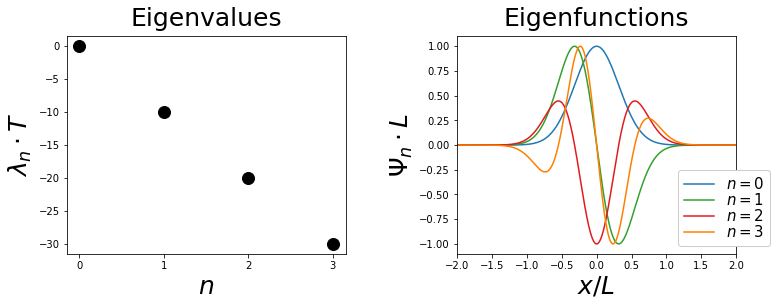

The 4 slowest-decaying eigenvalues:
n = 0	lambda_n = -1.00805e-07 * 1/T
n = 1	lambda_n = -1.00000e+01 * 1/T
n = 2	lambda_n = -2.00001e+01 * 1/T
n = 3	lambda_n = -3.00008e+01 * 1/T


In [7]:
vals = result['eigenvalues']
vecs = result['eigenvectors']
x = result['x']

fig,axes = plt.subplots(1,2,figsize=(12,4))
fig.subplots_adjust(wspace=0.4)

# define some colors we use for plotting
colors_0 = [(0.6509803921568628, 0.807843137254902, 0.8901960784313725), (0.6980392156862745, 0.8745098039215686, 0.5411764705882353), (0.984313725490196, 0.6039215686274509, 0.6), (0.9921568627450981, 0.7490196078431373, 0.43529411764705883)]
colors_1 = [(0.12156862745098039, 0.47058823529411764, 0.7058823529411765), (0.2, 0.6274509803921569, 0.17254901960784313), (0.8901960784313725, 0.10196078431372549, 0.10980392156862745), (1.0, 0.4980392156862745, 0.0)]

ax = axes[0]
ax.set_title('Eigenvalues',
             y=1.02,
             fontsize=fontsize)
ax.plot(np.arange(k),vals,
        color='black',
        markersize=12,
        marker='o',ls='')
ax.set_xlabel(r'$n$',fontsize=fontsize)
ax.set_ylabel(r'$\lambda_n \cdot T$',fontsize=fontsize)
ax.set_xticks(np.arange(k))

ax = axes[1]
ax.set_title('Eigenfunctions',
             y=1.02,
             fontsize=fontsize)
for i,y in enumerate(vecs):
    y /= np.max(np.fabs(y))
    ax.plot(x,y,
            color=colors_1[i],
           label=r'$n = ${0}'.format(i))
ax.set_xlim(np.min(x),np.max(x))
ax.set_xlabel(r'$x/L$',fontsize=fontsize)
ax.set_ylabel(r'$\Psi_n \cdot L$',fontsize=fontsize)
ax.legend(fontsize=15,
          labelspacing=0,
          loc='lower right',bbox_to_anchor=(1.15,0.),
         framealpha=1)
plt.show()
fig.savefig('spectrum-ornstein-uhlenbeck.jpg',bbox_inches='tight',dpi=150)
plt.close(fig)

print('The {0} slowest-decaying eigenvalues:'.format(k))
for i,eigenvalue in enumerate(vals):
    print("n = {0}\tlambda_n = {1:3.5e} * 1/T".format(i,eigenvalue))

For the slowest-decaying eigenvalue $\lambda_1$, we observe that $\lambda_1 \approx 0$. 
The eigenvalue $\lambda_1$ represents the steady-state exit rate from the interval $[x_l,x_r]$, i.e. the steady-state rate at which particles exit at the absorbing boundaries $x_l$, $x_r$. 

That this exit rate is small makes intuitive sense: **The force profile $a(x)$ we chose strongly confines a particle to the vicinity of the origin $x = 0$, so that the rate at which particles make it to the boundary points is very small!**

This is further confirmed by looking at the $n=1$ eigenfunction $\Psi_1$, which up to a factor represents the steady-state distribution of the absorbing-boundary system. In the plot above, the eigenfunction $\Psi_1$ is only visibly non-zero for approximately $x \in [-L,L]$, meaning that the probability to find a particle that is outside of this interval (i.e. closer to the boundary) is very very small.

# Comparison of numerical spectrum with the analytical Ornstein-Uhlenbeck spectrum

We now demonstrate that, for the strongly confining force we consider, the numerical spectrum shown above is essentially the spectrum of the Ornstein-Uhlenbeck process. The Ornstein-Uhlenbeck process is described by the Fokker-Planck operator above with our chosen drift and diffusion, with an infinite domain $x \in \mathbb{R}$ and boundary conditions $\rho(x) \rightarrow 0$ as $|x| \rightarrow \infty$.

The spectrum of the Ornstein-Uhlenbeck process is known analytically, and given by

\begin{align}
    \Psi_n &= c_n(2 \sigma) \frac{\mathrm{d}^n}{\mathrm{d}x^n} e^{- x^2/(2 \sigma)},\\
    \lambda_n &= -n a_1,
\end{align}

where $n \in \mathbb{N}_0 \equiv \{0,1,...\}$, and where 

\begin{align}
\sigma &= \frac{D_0}{a_1},\\
c_n(p) &= \frac{ p^{n/2} }{(p\pi)^{1/4} \sqrt{2^n n!}}.
\end{align}

This result and the notation we use are from the paper "Spectral Analysis of Fokker--Planck and Related Operators Arising From Linear Stochastic Differential Equations", by Daniel Liberzon and Roger W. Brockett, published in 
SIAM J. Control. Optim., vol. 38, p. 1453-1467 (2000), DOI: https://doi.org/10.1137/S0363012998338193

We now evaluate these analytical expressions for $\lambda_n$, $\Psi_n$ for the lowest few values of $n$, and compare the results with our numerical spectrum.

In [8]:
# import sympy, which we use for symbolic calculations
from sympy import *
init_printing(use_unicode=True)

In [9]:
# define symbolic variables
b, a, p = symbols(r'b a p',positive=True)
sigma = b**2/(2*a)
x_ = symbols('x')

In [10]:
# define the functions which appear in the analytical spectrum
def create_hk(k_int,sigma):
    '''
    creates prefactor of exponential for k-th Ornstein-Uhlenbeck eigenfunction
    '''
    hk = (2*sigma)**((k_int/2)) / ( (2*sigma*pi)**(Rational(1,4)) * (2**k_int*factorial(k_int))**(Rational(1,2)))
    hk *=  exp(x_**2/(2*sigma))
    hk *= Derivative(  exp(-x_**2/(2*sigma)) , (x_,k_int))
    return hk


def create_psi(k_int,sigma):
    '''
    creates k-th Ornstein-Uhlenbeck eigenfunction
    '''
    hk = create_hk(k_int,sigma)
    psi = hk*exp(-x_**2/(2*sigma))
    return psi

# Define general k-th eigenfunction
k_ = symbols('k',nonnegative=True,integer=True)
psi_k = create_psi(k_,sigma)

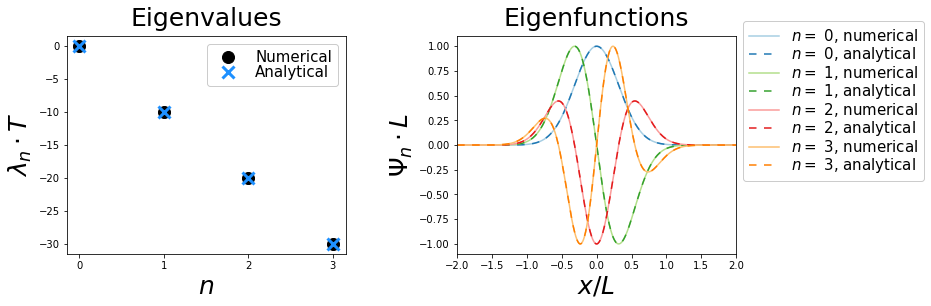

In [11]:
fig,axes = plt.subplots(1,2,figsize=(12,4))
fig.subplots_adjust(wspace=0.4)

ax = axes[0]
ax.set_title('Eigenvalues',
             y=1.02,
             fontsize=fontsize)
ax.plot(np.arange(k),vals,
        marker='o',ls='',
        markersize=12,
        color='black',
       label='Numerical')
ax.plot(np.arange(k),-np.arange(k)*a_1,
        marker='x',ls='',
        markersize=12,mew=3,
        color='dodgerblue',
       label='Analytical')
ax.set_xlabel(r'$n$',fontsize=fontsize)
ax.set_ylabel(r'$\lambda_n \cdot T$',fontsize=fontsize)
ax.set_xticks(np.arange(k))
ax.legend(fontsize=15,
          labelspacing=0,
          loc='upper right',
         framealpha=1)

ax = axes[1]
ax.set_title('Eigenfunctions',
             y=1.02,
             fontsize=fontsize)
for i, y_numerical in enumerate(vecs):
    cur_psi_func = lambdify(x_, psi_k.subs(k_,i).subs(a,a_1).subs(b,np.sqrt(2*D_0)).doit())
    y_analytical = cur_psi_func(x)
    y_analytical /= np.max(np.fabs(y_analytical))
    #
    y_numerical /= np.max(np.fabs(y_numerical))
    #
    integral_0 = np.trapz( np.fabs(y_numerical - y_analytical), x )
    integral_1 = np.trapz( np.fabs(y_numerical + y_analytical), x )
    if integral_0 > integral_1:
        y_numerical *= -1
    #
    ax.plot(x,y_numerical,
            color=colors_0[i],
            label=r'$n =$ {0}, numerical'.format(i))
    ax.plot(x,y_analytical,label=r'$n =$ {0}, analytical'.format(i),
                        color=colors_1[i],
           dashes=[5,5])
ax.set_xlim(np.min(x),np.max(x))
ax.set_xlabel(r'$x/L$',fontsize=fontsize)
ax.set_ylabel(r'$\Psi_n \cdot L$',fontsize=fontsize)
ax.legend(fontsize=15,
          labelspacing=0,
          loc='lower right',bbox_to_anchor=(1.7,0.3),
         framealpha=1)
plt.show()
plt.close(fig)

The agreement of the numerical spectrum on $[-2L,2L]$ with the analytical spectrum on $(-\infty,\infty)$ shows that the absorbing boundary conditions at $x =\pm 2L$ are not really important for the spectrum (at least on the scales shown in the plots; while the exit rate from the interval $[-2L,2L]$ is small, after a sufficiently long time particles will have left the interval!).

# Numerical spectrum for reflecting boundary conditions

We finally calculate the numerical spectrum using reflecting boundary conditions, to show that the resulting spectrum is (on the scales used in the following plots) identical to the absorbing-boundary spectrum.

In [12]:
new_boundary_condition = 'no-flux'

new_parameters = {
             'boundary_condition_left':new_boundary_condition,
             'boundary_condition_right':new_boundary_condition,
             }

fokker_planck_numerical.set_parameters(parameters=new_parameters)

In [13]:
result_reflecting_bcs = fokker_planck_numerical.spectrum(a=a,
                           D=D,
                           k=k)

vals_reflecting_bcs = result_reflecting_bcs['eigenvalues']
vecs_reflecting_bcs = result_reflecting_bcs['eigenvectors']
x_reflecting_bcs = result_reflecting_bcs['x']

print('The {0} slowest-decaying eigenvalues for reflecting boundary conditions:'.format(k))
for i,eigenvalue in enumerate(vals_reflecting_bcs):
    print("n = {0}\tlambda_n = {1:3.5e} * 1/T".format(i,eigenvalue))

Found temporally and spatially constant diffusivity D
The 4 slowest-decaying eigenvalues for reflecting boundary conditions:
n = 0	lambda_n = -8.90001e-09 * 1/T
n = 1	lambda_n = -1.00000e+01 * 1/T
n = 2	lambda_n = -2.00000e+01 * 1/T
n = 3	lambda_n = -3.00001e+01 * 1/T


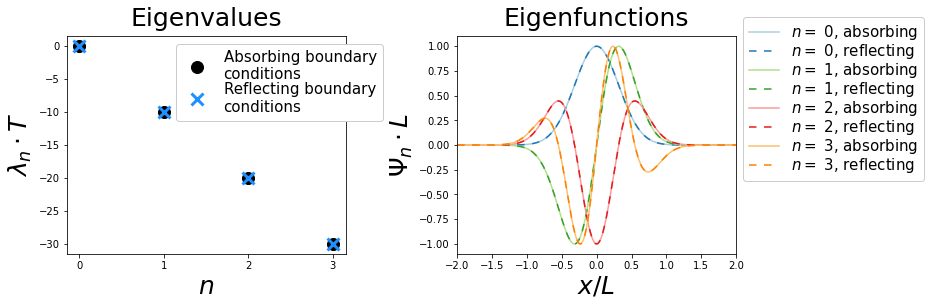

In [14]:
fig,axes = plt.subplots(1,2,figsize=(12,4))
fig.subplots_adjust(wspace=0.4)

ax = axes[0]
ax.set_title('Eigenvalues',
             y=1.02,
             fontsize=fontsize)
ax.plot(np.arange(k),vals,
        marker='o',ls='',
        markersize=12,
        color='black',
       label='Absorbing boundary\nconditions')
ax.plot(np.arange(k),vals_reflecting_bcs,
        marker='x',ls='',
        markersize=12,mew=3,
        color='dodgerblue',
       label='Reflecting boundary\nconditions')
ax.set_xlabel(r'$n$',fontsize=fontsize)
ax.set_ylabel(r'$\lambda_n \cdot T$',fontsize=fontsize)
ax.set_xticks(np.arange(k))
ax.legend(fontsize=15,
          labelspacing=0,
          loc='upper right',
          bbox_to_anchor=(1.16,1),
         framealpha=1)

ax = axes[1]
ax.set_title('Eigenfunctions',
             y=1.02,
             fontsize=fontsize)
for i, y_numerical in enumerate(vecs):
    y_numerical /= np.max(np.fabs(y_numerical))
    #
    y_numerical_reflecting_bcs = vecs_reflecting_bcs[i]
    y_numerical_reflecting_bcs /= np.max(np.fabs(y_numerical_reflecting_bcs))
    #
    integral_0 = np.trapz( np.fabs(y_numerical - y_numerical_reflecting_bcs), x )
    integral_1 = np.trapz( np.fabs(y_numerical + y_numerical_reflecting_bcs), x )
    if integral_0 > integral_1:
        y_numerical *= -1
    #
    ax.plot(x,y_numerical,
            color=colors_0[i],
            label=r'$n =$ {0}, absorbing'.format(i))
    ax.plot(x,y_numerical_reflecting_bcs,
            label=r'$n =$ {0}, reflecting'.format(i),
            color=colors_1[i],
           dashes=[5,5])
ax.set_xlim(np.min(x),np.max(x))
ax.set_xlabel(r'$x/L$',fontsize=fontsize)
ax.set_ylabel(r'$\Psi_n \cdot L$',fontsize=fontsize)
ax.legend(fontsize=15,
          labelspacing=0,
          loc='lower right',bbox_to_anchor=(1.7,0.3),
         framealpha=1)
plt.show()
plt.close(fig)

We see that the first few eigenvalues/eigenvectors of the absorbing-boundary spectrum are (on the scales used for plotting) identical to those of the reflecting-boundary spectrum. 

Of course, precisely speaking, there *are* differences in the spectra. For example, for reflecting boundary condition, it theoretically must hold that $\lambda_0 \equiv 0$, as for reflecting boundary conditions there must not be any outflux of particles from the domain. On the other hand, for absorbing boundary conditions it must hold that $\lambda_0 > 0$, as even in the steady state there is a small but finite outflux of probability from the domain.